Delta band power: 531817101985223.25
Theta band power: 328215912805034.75
Alpha band power: 136788379346039.58
Beta band power: 173081682060732.66
Gamma band power: 6697471593857541.0


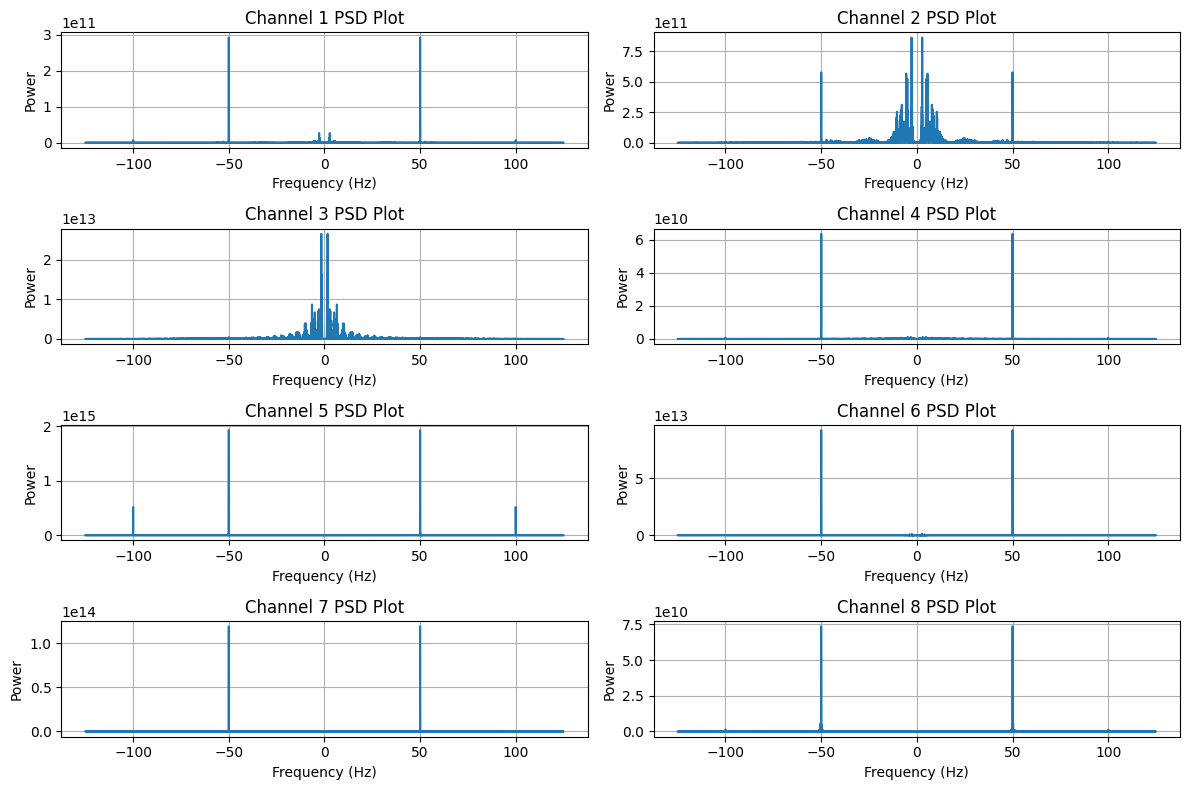

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load EEG data from CSV
df = pd.read_csv('raweeg.csv')

# Assuming your EEG data is stored in columns 'channel1' to 'channel8', replace them with your actual column names
eeg_data = df[['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8']].values

# Calculate the Fast Fourier Transform (FFT) for each channel
fft_values = np.fft.fft(eeg_data, axis=0)

# Calculate the frequency values
sampling_rate = 250  # Assuming a sampling rate of 1000 Hz, replace it with your actual sampling rate
freq_values = np.fft.fftfreq(len(eeg_data), 1 / sampling_rate)

# Calculate Power Spectral Density (PSD) for each channel
psd_values = np.abs(fft_values) ** 2

delta_band = np.sum(psd_values[(freq_values >= 0.5) & (freq_values < 4)])
theta_band = np.sum(psd_values[(freq_values >= 4) & (freq_values < 8)])
alpha_band = np.sum(psd_values[(freq_values >= 8) & (freq_values < 13)])
beta_band = np.sum(psd_values[(freq_values >= 13) & (freq_values < 30)])
gamma_band = np.sum(psd_values[(freq_values >= 30) & (freq_values < 100)])

print("Delta band power:", delta_band)
print("Theta band power:", theta_band)
print("Alpha band power:", alpha_band)
print("Beta band power:", beta_band)
print("Gamma band power:", gamma_band)

# Plot the frequency spectrum for each channel
plt.figure(figsize=(12, 8))
for i in range(eeg_data.shape[1]):  # Loop through each channel
    plt.subplot(4, 2, i+1)
    plt.plot(freq_values, psd_values[:, i])
    plt.title(f'Channel {i+1} PSD Plot')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.grid(True)

plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

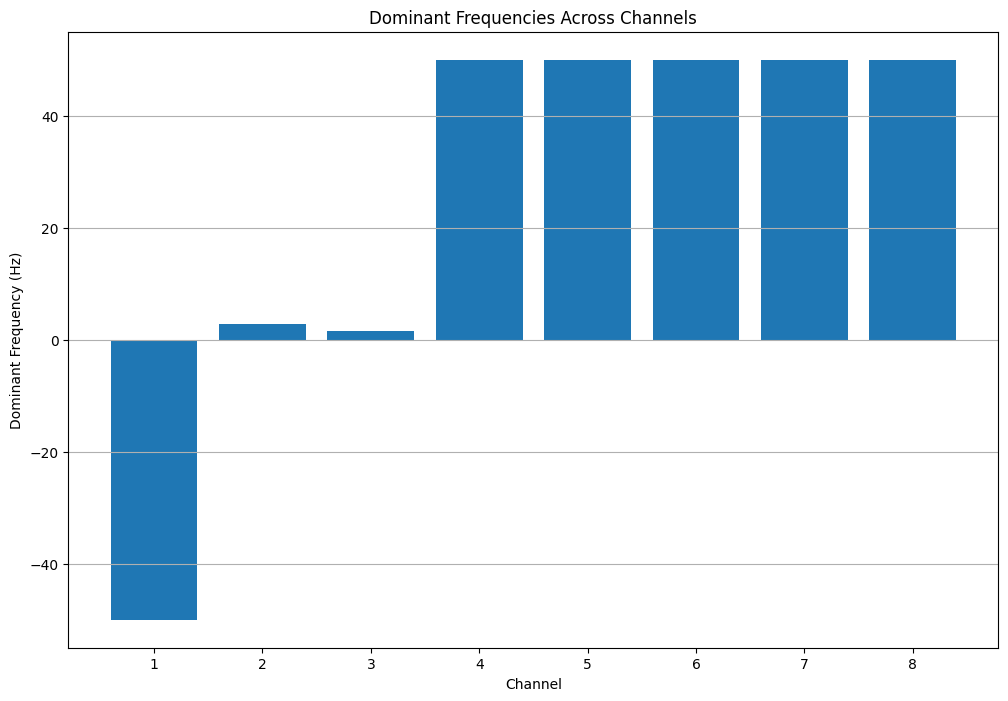

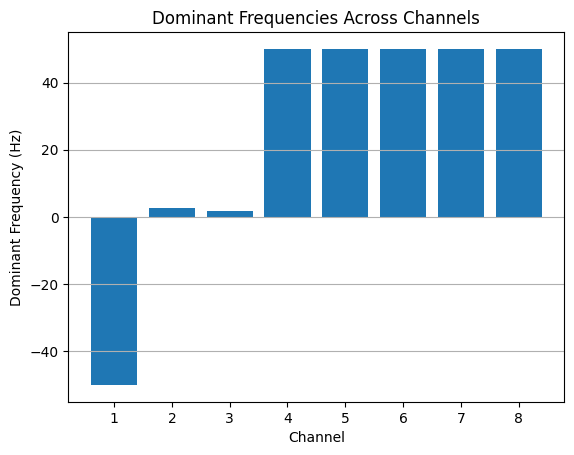

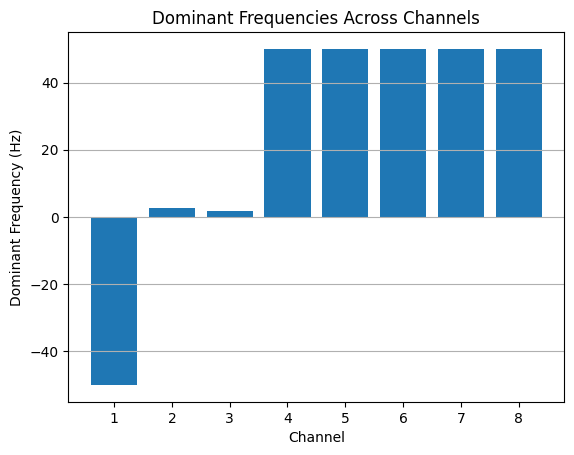

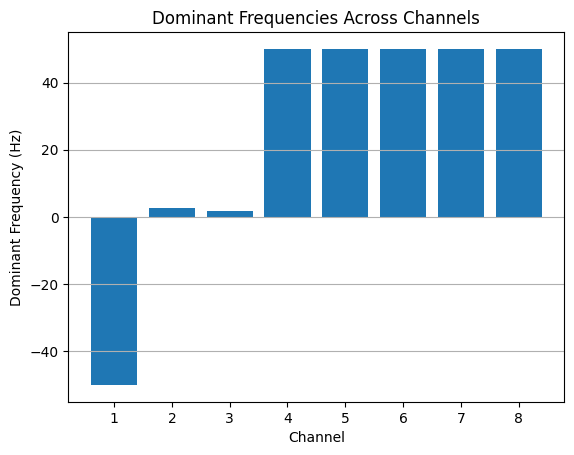

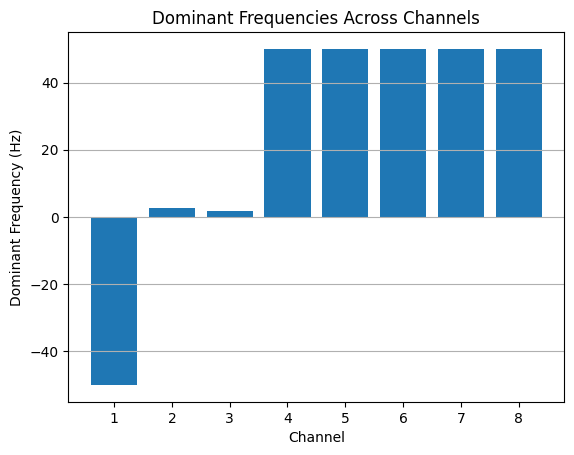

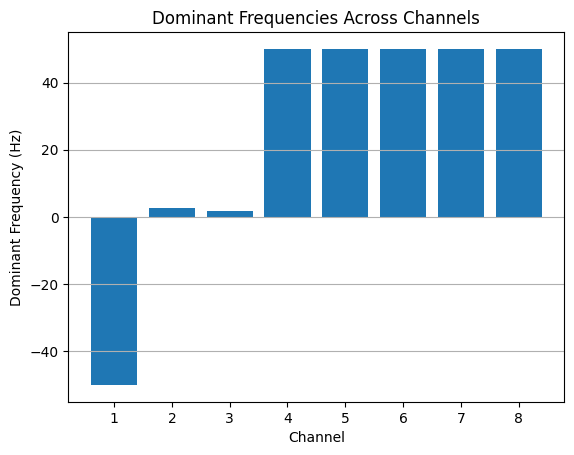

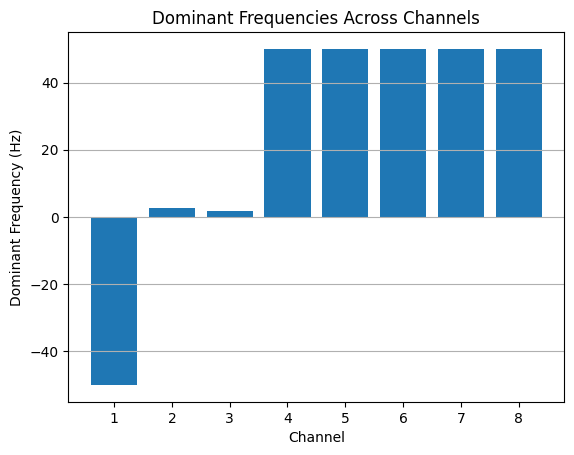

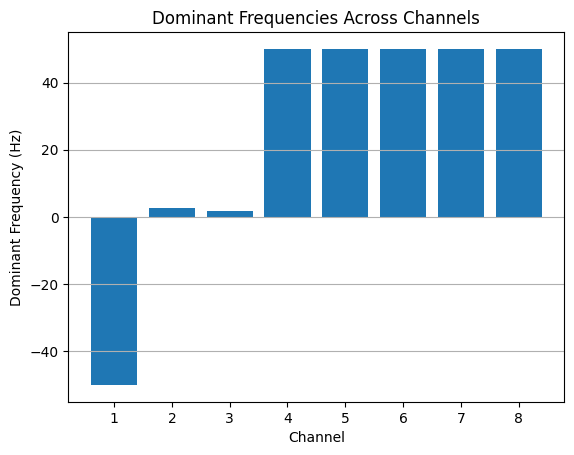

<Figure size 640x480 with 0 Axes>

In [5]:
dominant_freqs = freq_values[np.argmax(psd_values, axis=0)]

# Plot the dominant frequencies for each channel
plt.figure(figsize=(8, 6))

plt.figure(figsize=(12, 8))
for i in range(eeg_data.shape[1]):  # Loop through each channel
    plt.bar(range(1, eeg_data.shape[1]+1), dominant_freqs)
    plt.title('Dominant Frequencies Across Channels')
    plt.xlabel('Channel')
    plt.ylabel('Dominant Frequency (Hz)')
    plt.xticks(range(1, eeg_data.shape[1]+1))
    plt.grid(axis='y')
    plt.show()


plt.tight_layout()
plt.show()



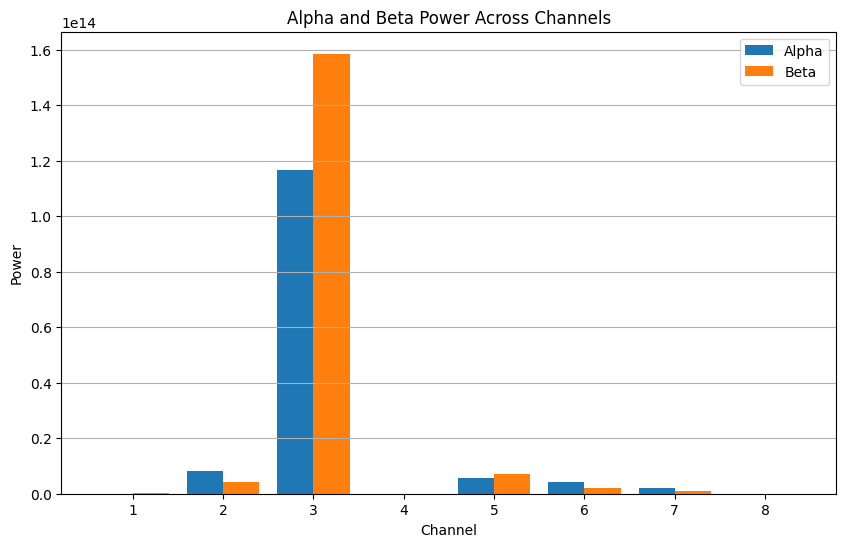

In [7]:
fft_values = np.fft.fft(eeg_data, axis=0)

# Calculate the frequency values
sampling_rate = 250  # Assuming a sampling rate of 1000 Hz, replace it with your actual sampling rate
freq_values = np.fft.fftfreq(len(eeg_data), 1 / sampling_rate)

# Calculate Power Spectral Density (PSD) for each channel
psd_values = np.abs(fft_values) ** 2

# Define frequency ranges for alpha and beta bands (in Hz)
alpha_range = (8, 13)
beta_range = (13, 30)

# Find indices corresponding to frequency ranges
alpha_indices = np.where((freq_values >= alpha_range[0]) & (freq_values < alpha_range[1]))[0]
beta_indices = np.where((freq_values >= beta_range[0]) & (freq_values < beta_range[1]))[0]

# Calculate total power within alpha and beta bands for each channel
alpha_power = np.sum(psd_values[alpha_indices, :], axis=0)
beta_power = np.sum(psd_values[beta_indices, :], axis=0)

# Plot the alpha and beta power for each channel
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, eeg_data.shape[1] + 1) - 0.2, alpha_power, width=0.4, label='Alpha')
plt.bar(np.arange(1, eeg_data.shape[1] + 1) + 0.2, beta_power, width=0.4, label='Beta')
plt.title('Alpha and Beta Power Across Channels')
plt.xlabel('Channel')
plt.ylabel('Power')
plt.xticks(np.arange(1, eeg_data.shape[1] + 1))
plt.legend()
plt.grid(axis='y')
plt.show()


In [23]:
import numpy as np

# Define the number of data points
n = 1000

# Define the sampling rate (spacing between consecutive data points)
sampling_rate = 250  # Hz

# Calculate the frequency values using fftfreq
freq_values = np.fft.fftfreq(n, 1 / sampling_rate)

# Print the frequency values
print(freq_values)


[   0.      0.25    0.5     0.75    1.      1.25    1.5     1.75    2.
    2.25    2.5     2.75    3.      3.25    3.5     3.75    4.      4.25
    4.5     4.75    5.      5.25    5.5     5.75    6.      6.25    6.5
    6.75    7.      7.25    7.5     7.75    8.      8.25    8.5     8.75
    9.      9.25    9.5     9.75   10.     10.25   10.5    10.75   11.
   11.25   11.5    11.75   12.     12.25   12.5    12.75   13.     13.25
   13.5    13.75   14.     14.25   14.5    14.75   15.     15.25   15.5
   15.75   16.     16.25   16.5    16.75   17.     17.25   17.5    17.75
   18.     18.25   18.5    18.75   19.     19.25   19.5    19.75   20.
   20.25   20.5    20.75   21.     21.25   21.5    21.75   22.     22.25
   22.5    22.75   23.     23.25   23.5    23.75   24.     24.25   24.5
   24.75   25.     25.25   25.5    25.75   26.     26.25   26.5    26.75
   27.     27.25   27.5    27.75   28.     28.25   28.5    28.75   29.
   29.25   29.5    29.75   30.     30.25   30.5    30.75   31.

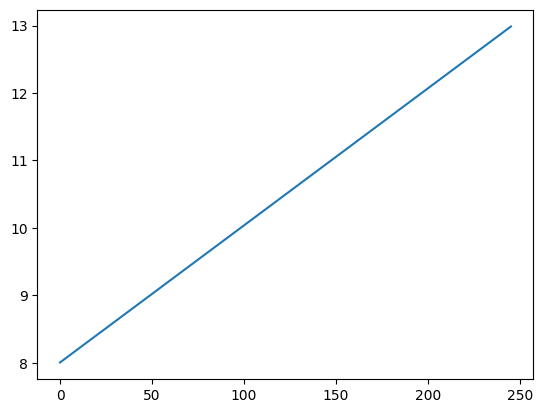

In [32]:
fft_values = np.fft.fft(eeg_data, axis=0)
    # Calculate the frequency values
sampling_rate = 250  # Assuming a sampling rate of 1000 Hz, replace it with your actual sampling rate
freq_values = np.fft.fftfreq(len(eeg_data), 1 / sampling_rate)
# print(len(eeg_data))
# print(freq_values)
    # Calculate Power Spectral Density (PSD) for each channel
psd_values = np.abs(fft_values) ** 2
    # Define frequency ranges for alpha and beta bands (in Hz)
alpha_range = (8, 13)
beta_range = (13, 30)

    # Find indices corresponding to frequency ranges
alpha_indices = np.where((freq_values >= alpha_range[0]) & (freq_values < alpha_range[1]))[0]
# print(alpha_indices)
beta_indices = np.where((freq_values >= beta_range[0]) & (freq_values < beta_range[1]))[0]
    # Calculate total power within alpha and beta bands for each channel
alpha_power = np.sum(psd_values[alpha_indices, :], axis=0)
beta_power = np.sum(psd_values[beta_indices, :], axis=0)

    # Find dominant frequencies for alpha and beta bands for each channel
# alpha_freqs = freq_values[alpha_indices][np.argmax(psd_values[alpha_indices, :], axis=0)]
# beta_freqs = freq_values[beta_indices][np.argmax(psd_values[beta_indices, :], axis=0)]
alpha_freqs = freq_values[alpha_indices]
beta_freqs = freq_values[beta_indices]

# print(alpha_freqs, beta_freqs)
plt.plot(alpha_freqs)



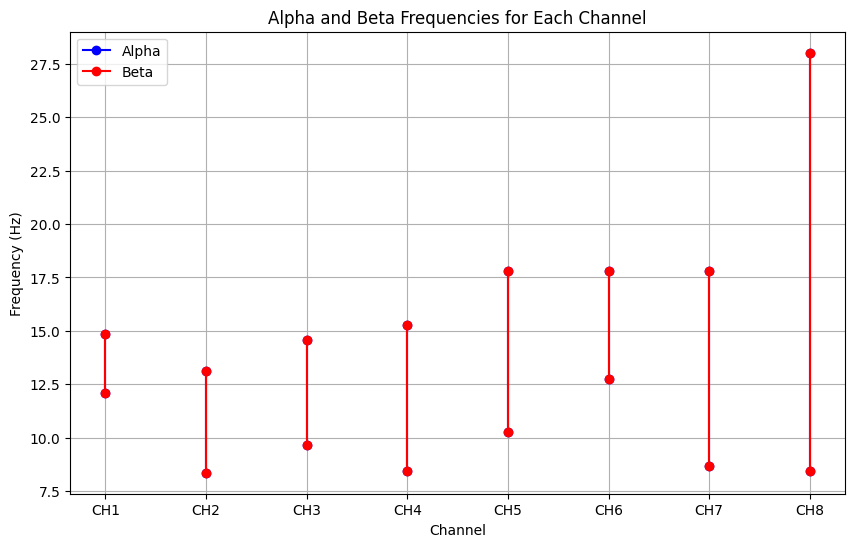

In [9]:
channels = ['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8']
plt.figure(figsize=(10, 6))
for i in range(len(channels)):
    plt.plot([i, i], [alpha_freqs[i], beta_freqs[i]], marker='o', color='b', label='Alpha', linestyle='-')
    plt.plot([i, i], [beta_freqs[i], alpha_freqs[i]], marker='o', color='r', label='Beta', linestyle='-')
plt.xticks(range(len(channels)), channels)
plt.xlabel('Channel')
plt.ylabel('Frequency (Hz)')
plt.title('Alpha and Beta Frequencies for Each Channel')
plt.legend(['Alpha', 'Beta'])
plt.grid(True)
plt.show()


In [10]:
df.shape

(12302, 10)

<AxesSubplot:title={'center':'CH3'}>

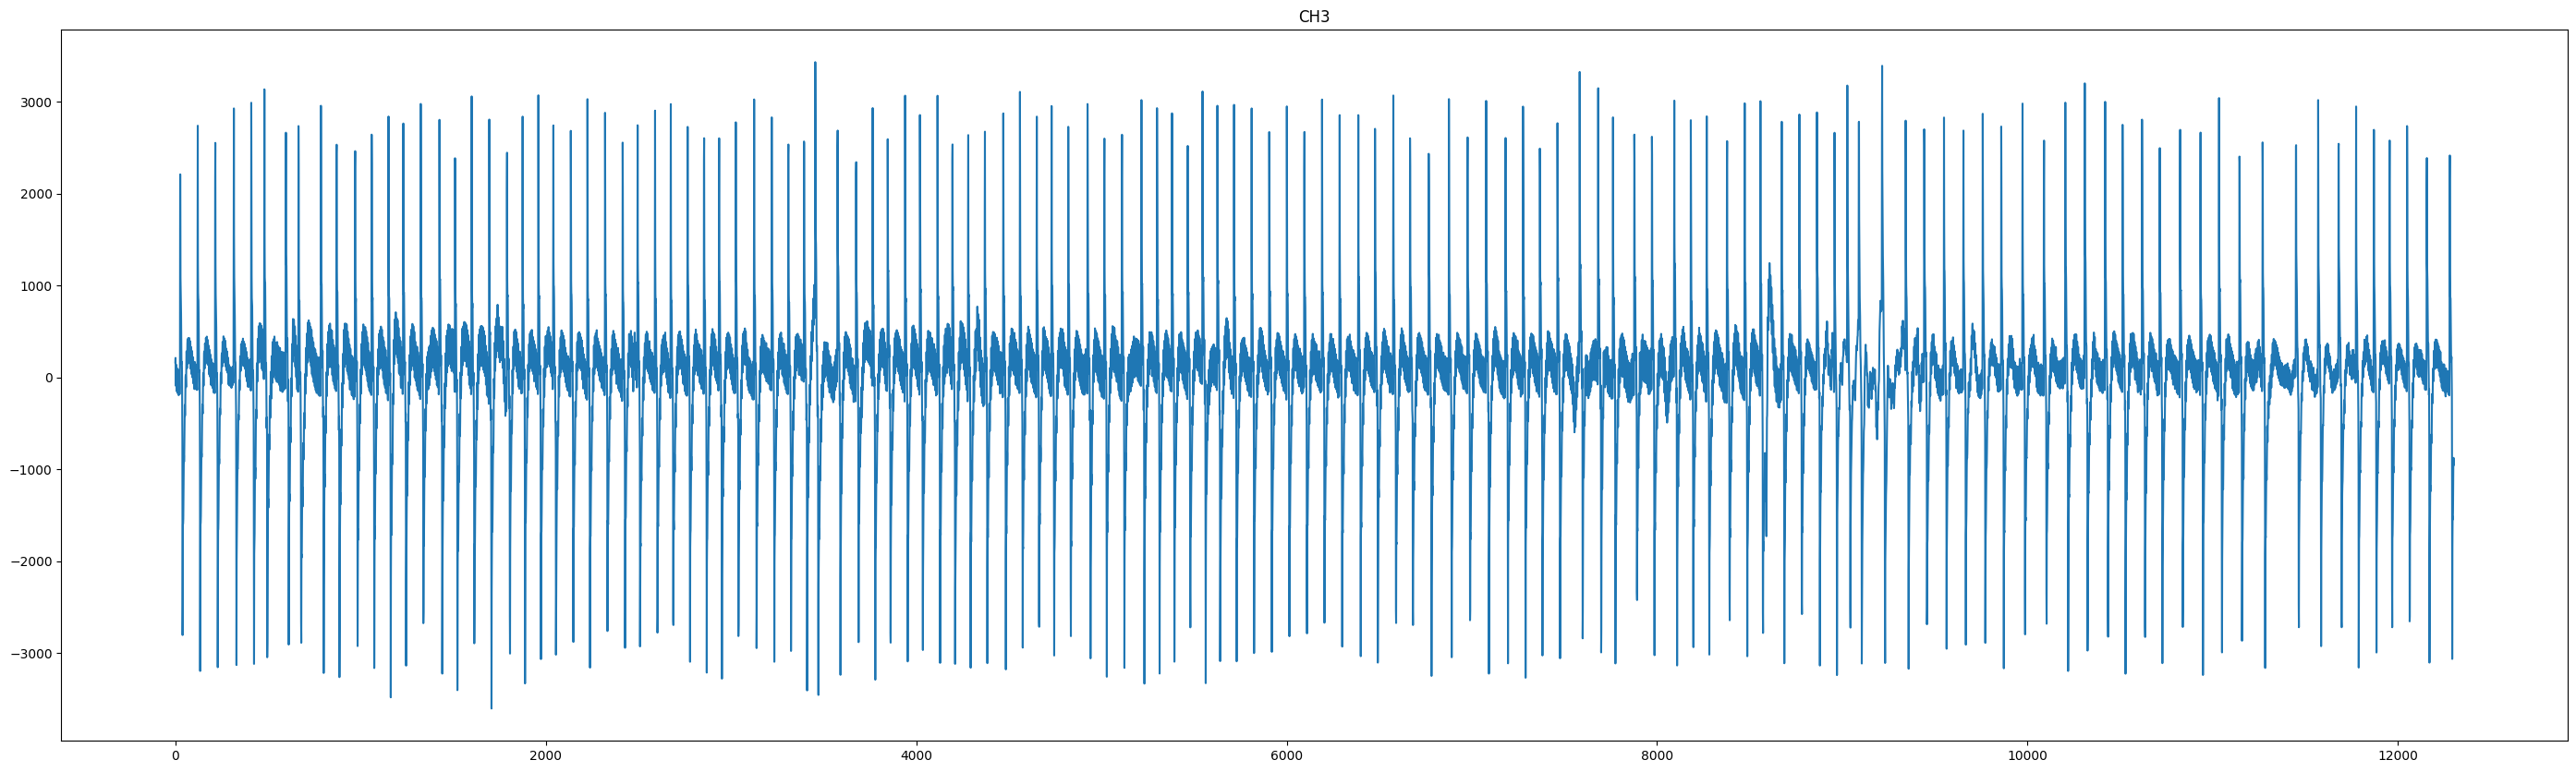

In [13]:
from matplotlib import pyplot as plt
df['CH2'].plot(kind='line', figsize=(35, 10), title='CH3')
# plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
import numpy as np
import pandas as pd

# Load EEG data (replace this with your actual EEG data)
df = pd.read_csv('raweeg.csv')

# Define constants
sampling_rate = 250  # Sampling rate in Hz
alpha_range = (8, 13)  # Alpha frequency range in Hz

# Initialize variables
window_size = 250  # Size of the FFT window (adjust as needed)
overlap = 125  # Overlap between consecutive windows (adjust as needed)
start_index = 0

# Iterate over EEG data in chunks and calculate FFT in real-time
while start_index + window_size < len(df):
    # Extract EEG data chunk
    eeg_data_chunk = df['CH1'].values[start_index:start_index+window_size]
    
    # Perform FFT
    fft_values = np.fft.fft(eeg_data_chunk)
    
    # Calculate frequency values
    freq_values = np.fft.fftfreq(window_size, 1 / sampling_rate)
    
    # Find indices corresponding to the alpha frequency range
    alpha_indices = np.where((freq_values >= alpha_range[0]) & (freq_values < alpha_range[1]))[0]
    
    # Calculate alpha power
    alpha_power = np.sum(np.abs(fft_values[alpha_indices])**2) / window_size
    alpha_freqs = freq_values[alpha_indices][np.argmax(psd_values[alpha_indices, :], axis=0)]

    # Print alpha power
    print("Alpha power:", alpha_freqs)
    
    # Update start index for next chunk
    start_index += overlap


Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: [12.  9. 10. 12. 12. 11. 12. 10.]
Alpha power: 